# PCA (Principal Component Analysis)
This section is focused on the following points:
- Reading the data from the file
- Creating the [PCA](https://builtin.com/data-science/step-step-explanation-principal-component-analysis).
- Printing the variance 
- Ranking the attributes by their loadings in the principal components
    

### Imports section

In [1]:
# Imports section
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import Orange
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Read the file in the format given

In [2]:
# Read the file in the format given
text=""
nLines=0
nAttributes=0
nClasses=0
attributesName = []
data = []
dataPerAttribute = []
classes = []
try:
    with open("archivo.txt","r") as file:
        count=0
        for line in file:
            if count < 3:
                if count == 0:
                    nLines = int(line.strip())
                else:
                    if count == 1:
                        nAttributes = int(line.strip())
                        for i in range(1,nAttributes+1):
                            attributesName.append("att"+str(i))
                            dataPerAttribute.append([])
                    else:
                        if count == 2:
                            nClasses = int(line.strip())
            else:
                split_string_S = line.strip().split(',')
                
                count_split = 0
                split_string_n = []
                for split in split_string_S:
                    if count_split >= nAttributes:
                        split_string_n.append(int(split))
                    else:
                        split_string_n.append(float(split))
                    count_split += 1
                    
                data.append(split_string_n)
                classes.append(split_string_n[nAttributes])
                n_attribute = 0
                for attribute in split_string_n:
                    if n_attribute >= nAttributes:
                        break
                    else:
                        dataPerAttribute[n_attribute].append(attribute)
                        n_attribute += 1
            count += 1
        print("EOF reached")
except FileNotFoundError:
    text="Archivo no existe"
    exit()
finally:
    file.close()
    # print(str(nLines) + "\n")
    # print(str(nAttributes) + "\n")
    # print(str(nClasses) + "\n")
    # print(attributesName)
    # print(data)

EOF reached


### Turning the data into a DataFrame python object

In [3]:
# Turning the data into a DataFrame python object

columns_ = attributesName[:]
columns_.append("target")

dataFrame = pd.DataFrame(data=data, columns=columns_)
dataFrame


,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,att11,att12,att13,att14,att15,att16,att17,att18,att19,target
0,140.0,125.0,0.0,0.0,0.000000,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818,0
1,188.0,133.0,0.0,0.0,0.000000,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817,0
2,105.0,139.0,0.0,0.0,0.000000,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946,0
3,34.0,137.0,0.0,0.0,0.000000,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272,0
4,39.0,111.0,0.0,0.0,0.000000,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,225.0,58.0,0.0,0.0,0.000000,0.333334,0.421637,0.444445,0.344265,8.333333,5.555555,14.111111,5.333334,-8.333333,17.333334,-9.000000,14.111111,0.622222,-2.068564,6
416,170.0,154.0,0.0,0.0,0.000000,0.111111,0.172133,0.055556,0.136083,0.074074,0.000000,0.222222,0.000000,-0.222222,0.444444,-0.222222,0.222222,0.222222,-2.094395,6
417,238.0,61.0,0.0,0.0,0.000000,0.666667,0.471405,0.722222,0.490653,8.777778,5.888889,14.333333,6.111111,-8.666667,16.666666,-8.000000,14.333333,0.588823,-2.121837,6
418,189.0,62.0,0.0,0.0,0.000000,0.388889,0.250924,0.444444,0.344265,7.629630,5.000000,13.111111,4.777778,-7.888889,16.444445,-8.555555,13.111111,0.635938,-2.066953,6


### Separating the data and standarizing

In [4]:
# Separating out the features
x = dataFrame.loc[:, attributesName].values
# Separating out the target
y = dataFrame.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

### Creating the Principal Components


In [5]:
# Creating the Principal Components
pcn = int(input('Number of principal components:'))
if pcn > nAttributes:
    print(str(nAttributes) + " is the maximum number of principal components")
    pcn = min([nAttributes,pcn])
else:
    if pcn <= 0:
        print("1 is the minimum number of principal components")
        pcn = max([1,pcn])
        
print ("Creating PCA with " + str(pcn) + " components")
pca = PCA(n_components=pcn)
principalComponents = pca.fit_transform(x)
pc_names = []
for i in range(1,pcn+1):
    pc_names.append("principal component "+ str(i))

principalDf = pd.DataFrame(data = principalComponents
             , columns = pc_names)
principalDf 

Number of principal components:8
Creating PCA with 8 components


,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8
0,-2.299677,-0.343837,-1.036211,-0.321205,-0.060937,-0.057857,-0.203537,0.267093
1,-2.371925,-0.403867,-1.035717,0.123448,0.295759,-0.181934,0.080185,0.200005
2,-2.389590,-0.266572,-0.770185,-0.495633,-0.251245,0.063266,-0.559136,0.238570
3,-2.514506,-0.096834,-0.574882,-1.135091,-0.784593,0.285231,-1.009104,0.241223
4,-2.236746,-0.124341,-0.914775,-1.225178,-0.787284,0.239401,-0.870827,0.379662
...,...,...,...,...,...,...,...,...
415,-1.307175,-0.558173,-2.131070,-0.175959,0.190861,-0.433279,1.093097,0.207017
416,-2.480510,-0.440099,-0.668901,0.515578,0.769818,-0.010862,-0.690503,0.771565
417,-1.262135,-0.478888,-2.066865,-0.002415,0.337953,-0.427636,1.113872,0.188592
418,-1.403244,-0.494110,-2.024198,-0.459423,-0.073273,-0.330329,0.834267,0.192290


### Joining the standarized data with the targets

In [6]:
#joining the standarized data with the targets
finalDf = pd.concat([principalDf, dataFrame[['target']]], axis = 1)
finalDf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,target
0,-2.299677,-0.343837,-1.036211,-0.321205,-0.060937,-0.057857,-0.203537,0.267093,0
1,-2.371925,-0.403867,-1.035717,0.123448,0.295759,-0.181934,0.080185,0.200005,0
2,-2.389590,-0.266572,-0.770185,-0.495633,-0.251245,0.063266,-0.559136,0.238570,0
3,-2.514506,-0.096834,-0.574882,-1.135091,-0.784593,0.285231,-1.009104,0.241223,0
4,-2.236746,-0.124341,-0.914775,-1.225178,-0.787284,0.239401,-0.870827,0.379662,0
...,...,...,...,...,...,...,...,...,...
415,-1.307175,-0.558173,-2.131070,-0.175959,0.190861,-0.433279,1.093097,0.207017,6
416,-2.480510,-0.440099,-0.668901,0.515578,0.769818,-0.010862,-0.690503,0.771565,6
417,-1.262135,-0.478888,-2.066865,-0.002415,0.337953,-0.427636,1.113872,0.188592,6
418,-1.403244,-0.494110,-2.024198,-0.459423,-0.073273,-0.330329,0.834267,0.192290,6


### Plotting the data into a 2 dimensional space.


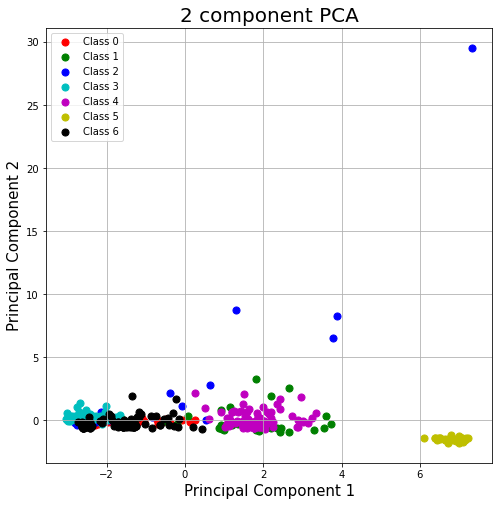

In [7]:
# PLotting the data into a 2 dimensional data.
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = range(0,nAttributes)
targetsLabels = []
for i in targets:
    targetsLabels.append("Class "+str(i))
colors = ['r', 'g', 'b','c','m','y','k']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targetsLabels)
ax.grid()

### Variance explained and ranking the attributes by loadings


In [8]:
# Variance explained
print (pca.explained_variance_)
print (pca.explained_variance_ratio_)
print (pca.explained_variance_ratio_.cumsum())

[7.46644546 2.988641   1.91878191 1.13303509 1.0440996  0.84891871
 0.75817581 0.69220795]
[0.4138149  0.16564029 0.10634519 0.06279652 0.05786742 0.04704986
 0.04202059 0.03836444]
[0.4138149  0.57945519 0.68580038 0.7485969  0.80646432 0.85351418
 0.89553477 0.93389921]


To compute PCA, available libraries first compute the singular value decomposition (SVD) of the original dataset:\n
$$\mathbf{X} = \mathbf{U} \mathbf{S} \mathbf{V}^\top$$
The columns of $\mathbf{V}$ contains the principal axes, $\mathbf{S}$ is a diagonal matrix containing the singular values, and the columns of $\mathbf{U}$ are the principal components scaled to unit norm.

Standardized PCs are given by $\sqrt{N-1}\mathbf{U}$
As we have seen before, the covariance matrix is defined as
$$\mathbf{\Sigma} =\frac{1}{N-1}\mathbf{X}^\top \mathbf{X} = \mathbf{V}\frac{\mathbf{S}^2}{N-1}\mathbf{V}^\top=\mathbf{VEV}^\top$$

This means that the principal axes $\mathbf{V}$ are eigenvectors of the covariance matrix and $\mathbf E=\frac{\mathbf S^2}{N-1}$ are its eigenvalues.

To compute the Loading matrix, namely the correlations between the original variable and the principal components, we just need to compute the cross-covariance matrix:
$$Cov(\mathbf{X}, \mathbf{Y}) = \frac{\mathbf{X}^\top \mathbf{Y}}{N-1}$$
In our case, $\mathbf{X}$ contains the original variables, and $\mathbf{Y}$ contains the standardized principal components, so
$$Cov(\mathbf{X}, \mathbf{Y}) = \frac{\mathbf{X}^\top(\sqrt{N-1}\mathbf{U})}{N-1} = \frac{\mathbf{V}\mathbf{S}\mathbf{U}^\top\mathbf{U}}{\sqrt{N-1}} = \mathbf{V}\frac{\mathbf{S}}{\sqrt{N-1}}=\mathbf{V}\sqrt{\mathbf E}=\mathbf{L}$$

>As you can see, from a numerical point of view, the loadings $\mathbf{L}$
 are equal to the coordinates of the variables divided by the square root of the eigenvalue associated with the component.
 
Therefore, if we want to compute the loading matrix with scikit-learn we just need to remember that:
- $\mathbf{V}$ is stored in pca.components_.T.
- $\sqrt{\mathbf E}$ is given by np.sqrt(pca.explained_variance_)
 
Note: The full explanation [here](https://scentellegher.github.io/machine-learning/2020/01/27/pca-loadings-sklearn.html).

In [9]:
# Calculating the loadings from the features in the principal components
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
    
loading_matrix = pd.DataFrame(loadings, columns=pc_names, index=attributesName)
loading_matrix


,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8
att1,-4.109671e-03,-0.141555,-2.583533e-01,6.253317e-01,4.968872e-01,-1.920292e-01,0.475942,-7.017842e-02
att2,-2.873147e-01,0.086353,6.030937e-01,4.298660e-01,-2.937826e-02,-3.292616e-02,-0.219048,-4.330659e-01
att3,-3.033662e-16,0.000000,-3.844705e-17,-5.908836e-17,1.418049e-16,-4.794955e-17,-0.000000,9.236948e-17
att4,-1.669548e-02,0.014277,4.671150e-01,1.985279e-01,-5.009942e-01,-6.377847e-01,0.093598,2.549147e-01
att5,1.614005e-01,0.359914,-3.662536e-02,4.392211e-01,-4.458591e-01,5.231617e-01,0.246997,3.087519e-01
att6,2.408962e-01,0.743258,-8.746233e-03,1.281520e-01,-9.440556e-02,5.902235e-02,-0.082424,-2.674710e-01
att7,1.363171e-01,0.885217,-4.298401e-02,-1.692278e-01,2.084802e-01,-1.762859e-01,0.058200,1.253129e-01
att8,2.569929e-01,0.799481,4.890384e-02,1.155054e-01,-5.651433e-02,6.912954e-02,-0.096868,-1.365557e-01
att9,1.394838e-01,0.886433,-3.378282e-02,-1.483182e-01,2.234005e-01,-1.681901e-01,0.051877,1.460859e-01
att10,9.643826e-01,-0.104849,2.012704e-01,-7.933303e-02,3.630321e-02,2.581447e-02,0.052022,4.375257e-03


In [10]:
# Printing the loadings sorted by each principal component
sorted_loadings = loading_matrix.sort_values(by=pc_names)
sorted_loadings

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8
att14,-8.731451e-01,0.006244,-1.398940e-01,7.146402e-02,3.327889e-02,-2.241440e-02,-0.243607,1.752508e-01
att16,-7.072033e-01,0.084247,5.203668e-01,-2.426578e-01,1.328806e-01,1.493241e-01,0.290906,3.104871e-02
att19,-5.609900e-01,0.030974,7.486190e-01,-7.804789e-02,1.372678e-01,1.413950e-01,0.157847,-1.789344e-02
att18,-4.000100e-01,0.072609,-3.444933e-01,-3.549038e-01,-4.306274e-01,-9.039278e-02,0.447662,-4.082441e-01
att2,-2.873147e-01,0.086353,6.030937e-01,4.298660e-01,-2.937826e-02,-3.292616e-02,-0.219048,-4.330659e-01
att4,-1.669548e-02,0.014277,4.671150e-01,1.985279e-01,-5.009942e-01,-6.377847e-01,0.093598,2.549147e-01
att1,-4.109671e-03,-0.141555,-2.583533e-01,6.253317e-01,4.968872e-01,-1.920292e-01,0.475942,-7.017842e-02
att3,-3.033662e-16,0.000000,-3.844705e-17,-5.908836e-17,1.418049e-16,-4.794955e-17,-0.000000,9.236948e-17
att7,1.363171e-01,0.885217,-4.298401e-02,-1.692278e-01,2.084802e-01,-1.762859e-01,0.058200,1.253129e-01
att9,1.394838e-01,0.886433,-3.378282e-02,-1.483182e-01,2.234005e-01,-1.681901e-01,0.051877,1.460859e-01
